In [1]:
import robot_plotter as rp
import models_functions as mf
import traj
import numpy as np
import matplotlib.pyplot as plt
import robot_sim as sim
import sim_helper_funcs as hfunc
import save_load_data as sldat
import matplotlib.style as style 
#style.use('tableau-colorblind10')


In [11]:
# Load all trajectories
dt = 0.01
trajs = [hfunc.path1_slow, hfunc.path2_slow, hfunc.path3_slow, hfunc.path4_slow, hfunc.path5_slow, hfunc.path6_slow] 
paths = [None]*6
for i in range(6):
    temp, _, _ = trajs[i](dt)
    paths[i] = temp
anchors = [*hfunc.anc_setup1(), *hfunc.anc_setup2(), hfunc.anc_setup5()]


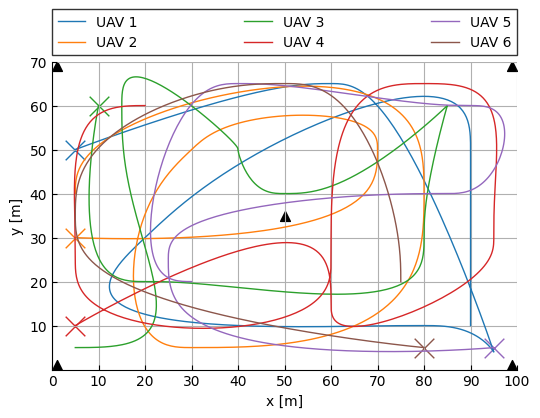

In [29]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['lines.linewidth'] = 1.0


fig, ax = rp.setup_plot()
# Plot ground truth
for i in range(6):
    name = 'UAV ' + str(i+1)
    rp.plot_position(ax, paths[i][:,::100], color=color_cycle[i], marker=None, draw_arrow=False, label=name) # fix label

# Mark the start position
for i in range(6):
    ax.scatter(paths[i][1,0], paths[i][2,0], s=200.0, marker='x', color=color_cycle[i])

# Plot anchor positions
for i in range(5):
    ax.scatter(anchors[i][1], anchors[i][2], s=50.0, marker='^', color='black')

# Organize the legend
ax.legend(loc='upper left', ncols=3, borderaxespad=0., fancybox=False, edgecolor='black', bbox_to_anchor=(0.0, 1.02, 1.0, 0.15), mode='expand')
#plt.tight_layout()
plt.savefig("trajectories.pdf", format="pdf", bbox_inches="tight")
